In [1]:
import pandas as pd
import math
import numpy as np
import sklearn
from scipy import stats
from sklearn.base import BaseEstimator
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

%matplotlib inline

In [2]:
x=pd.read_csv("^GSPC.csv", parse_dates=True)["Open"]
y=pd.read_csv("KO1.csv", parse_dates=True)["Open"]

In [3]:
x.head()

0    1171.229980
1    1188.579956
2    1087.300049
3    1031.099976
4    1107.530029
Name: Open, dtype: float64

In [4]:
x.describe()

count     121.000000
mean     2008.226021
std       601.172559
min      1031.099976
25%      1412.199951
50%      2018.209961
75%      2476.959961
max      3244.669922
Name: Open, dtype: float64

In [5]:
y.head()

0    27.680000
1    26.855000
2    25.559999
3    25.150000
4    27.910000
Name: Open, dtype: float64

In [6]:
y.describe()

count    121.000000
mean      41.050868
std        6.469166
min       25.150000
25%       37.880001
50%       41.500000
75%       44.599998
max       58.750000
Name: Open, dtype: float64

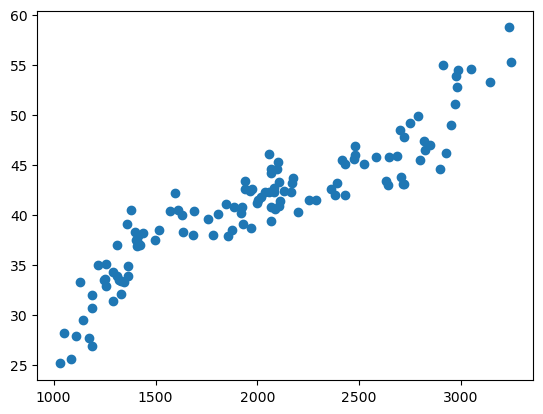

In [7]:
plt.scatter(x,y)

(А)Використовуючи комп'ютерне програмне забезпечення для виконання регресійних розрахунків, а саме метод 3-х точок 
оцініть за допомогою регресії (1-3) параметри а і b для компанії.

In [8]:
res_data=PrettyTable(['Функція','R^2', 'r','F'])

In [9]:
def exp_(x,a,b,c):
    return a * np.power(b,x) + c

def gomp(x,a,b,c):
    return np.exp(a*np.power(b,x)+c)

def log_(x,a,b,c):
    return 1/(a*(b**x)+c)

In [10]:
class Model(BaseEstimator):
    def __init__(self):
        super(Model,self).__init__()
        
    def fit(self,x,y=None):
        self.n = x.shape[0]
        
        set1,set2,set3 = Model.split_data(y)
        x1,x2,x3 = Model.split_data(x)
        
        self.t1,self.t2,self.t3 = np.median(x1),np.median(x2),np.median(x3)
        self.y1,self.y2,self.y3 = np.median(set1),np.median(set2), np.median(set3)
        
        self.b = self._estimate_b()
        self.a = self._estimate_a() 
        self.c = self._estimate_c()
        
        return self
        
    def coef_(self):
        return self.a,self.b,self.c
    
    @staticmethod
    def f_statistic(y,y_pred):
        n=y.shape[0]
        R_2 = r2_score(y,y_pred)
        return (R_2*(n-2))/((1-R_2))
    
    @staticmethod
    def split_data(data):
        n = data.shape[0]
        if n%3==0:
            return data[:n//3],data[n//3:2*n//3],data[2*n//3:]           
        elif n%2==1:
            return data[:n//3],data[n//3:2*n//3+1],data[2*n//3+1:]
        else:
            return data[:n//3+1],data[n//3+1:2*n//3+1],data[2*n//3+1:]
    
    def _estimate_a(self):
        return (self.y3-self.y2)/(np.power(self.b,self.t3)-np.power(self.b,self.t2))
    
    def _estimate_b(self):
        delta = (self.t2-self.t1)
        k = np.log((self.y3-self.y2)/(self.y2-self.y1))
        return np.exp(k/delta)
    
    def _estimate_c(self):
        return self.y1 - self.a*self.b**self.t1

(B) Зробіть порівняльну характеристику для всіх моделей

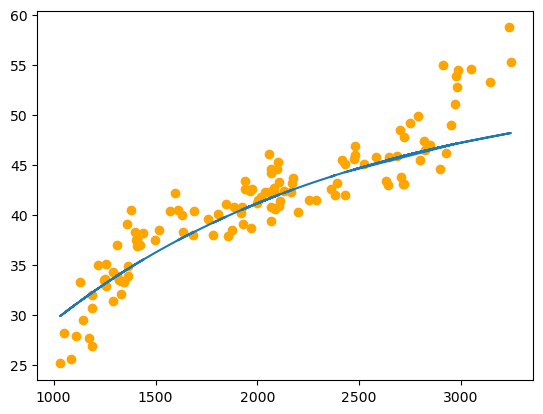

In [11]:
model = Model().fit(x,y)
a,b,c = model.coef_()
y_pr = exp_(x,a,b,c)
plt.scatter(x,y,c='orange')
plt.plot(x,y_pr)
r_sq= r2_score(y,y_pr)
r=pearsonr(y,y_pr)[0]
f_val=model.f_statistic(y,y_pr)
res_data.add_row(["exp_",r_sq, r, f_val])

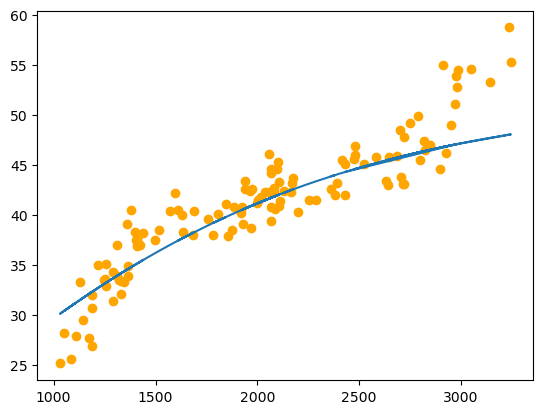

In [12]:
model = Model().fit(x,np.log(y))
a,b,c = model.coef_()
y_pr = gomp(x,a,b,c)
plt.scatter(x,y,c='orange')
plt.plot(x,y_pr)
r_sq= r2_score(y,y_pr)
r=pearsonr(y,y_pr)[0]
f_val=model.f_statistic(y,y_pr)
res_data.add_row(["gompertz",r_sq, r, f_val])

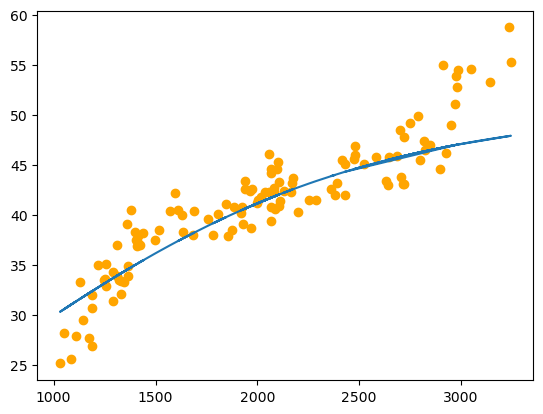

In [13]:
model = Model().fit(x,1/y)
a,b,c = model.coef_()
y_pr = log_(x,a,b,c)
plt.scatter(x,y,c='orange')
plt.plot(x,y_pr)
r_sq= r2_score(y,y_pr)
r=pearsonr(y,y_pr)[0]
f_val=model.f_statistic(y,y_pr)
res_data.add_row(["log",r_sq, r, f_val])

In [14]:
print(res_data)

+----------+--------------------+--------------------+--------------------+
| Функція  |        R^2         |         r          |         F          |
+----------+--------------------+--------------------+--------------------+
|   exp_   | 0.8059188988669127 | 0.9148971584794864 | 494.1457380716224  |
| gompertz | 0.8017076387267009 | 0.9128976258750087 | 481.12397470009785 |
|   log    | 0.797599590830251  | 0.910929246336331  | 468.94347545116466 |
+----------+--------------------+--------------------+--------------------+


Отже, експоненційна функція показала найкращий результат за всіма критеріями.

(C) Оберіть найкращу з моделей і для неї проведіть повний статистичний аналіз. 

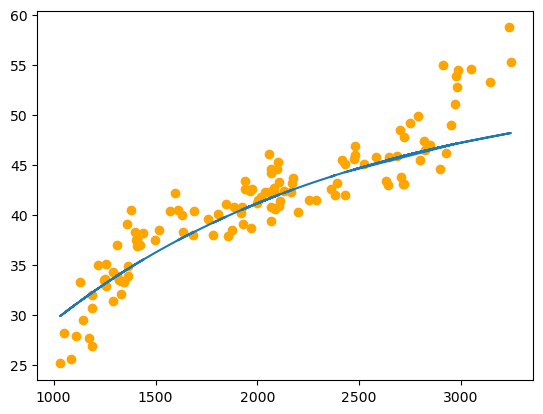

In [15]:
model = Model().fit(x,y)
a,b,c = model.coef_()
y_pr = exp_(x,a,b,c)
plt.scatter(x,y,c='orange')
plt.plot(x,y_pr)
r_sq= r2_score(y,y_pr)
r=pearsonr(y,y_pr)[0]
f_val=model.f_statistic(y,y_pr)
res_data.add_row(["exp_",r_sq, r, f_val])

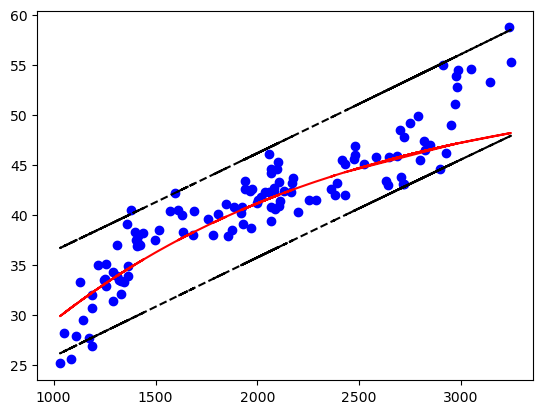

In [16]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
X = sm.add_constant(x)
model = sm.OLS(y,X)
lin = model.fit()
st, data, ss2 = summary_table(lin, alpha=0.05)
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T
plt.scatter(x, y, marker = "o", color = "blue")
plt.plot(x, y_pr, color = "red")
plt.plot(x, predict_ci_low, color = "black",linestyle = "--")
plt.plot(x, predict_ci_upp, color = "black",linestyle = "--")
plt.show()

(D) Зробіть прогноз на наступний місяць, якщо ринок підніметься на 20% від попереднього місяця.

In [17]:
x_last=x.tail(1)*1.2
y_next_month=exp_(x_last,a,b,c)
print("Predicted: "+str(y_next_month))

Predicted: 120    46.876033
Name: Open, dtype: float64
